In [17]:
import collections
from functools import cache
from pathlib import Path

import networkx as nx
import graphviz

In [2]:
test_text = """start-A
start-b
A-c
A-b
b-d
A-end
b-end"""

test_text2 = """dc-end
HN-start
start-kj
dc-start
dc-HN
LN-dc
HN-end
kj-sa
kj-HN
kj-dc"""

test_text3 = """fs-end
he-DX
fs-he
start-DX
pj-DX
end-zg
zg-sl
zg-pj
pj-he
RW-he
fs-DX
pj-RW
zg-RW
start-pj
he-WI
zg-he
pj-fs
start-RW"""

input_text = Path("input.txt").read_text()

In [3]:
def make_graph(text):

    adjacency = [tuple(adj.split("-")) for adj in text.split("\n")]
    caves = set([c for adj in adjacency for c in adj])

    G = nx.Graph()
    G.add_nodes_from(caves)
    G.add_edges_from(adjacency)

    return G

In [4]:
@cache
def test_valid_path(path):
    node_count = collections.Counter(path)
    for node, count in node_count.items():

        if count > 1:

            if node.islower():

                return False

        if count > 10:
            return False

    return True

In [5]:
@cache
def find_paths(graph, subpath, end):

    # print(f"find paths with {subpath=} {end=}")

    new_paths = []
    start = subpath[-1]

    for edge in graph.edges(start):

        new_path = subpath + (edge[1],)

        if not test_valid_path(new_path):
            continue

        if edge[1] == end:
            new_paths.append(new_path)

        for path in find_paths(graph, new_path, end):
            new_paths.append(path)

    return new_paths

10


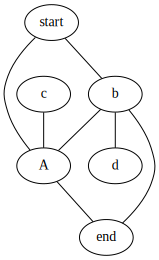

In [20]:
G = make_graph(test_text)
print(len(find_paths(G, ("start",), "end")))
graphviz.Source(nx.nx_pydot.to_pydot(G).to_string())

19


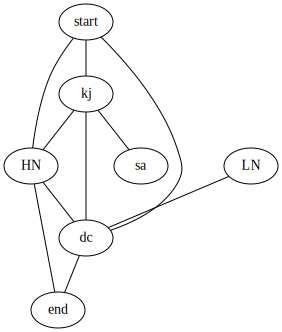

In [21]:
G = make_graph(test_text2)
print(len(find_paths(G, ("start",), "end")))
graphviz.Source(nx.nx_pydot.to_pydot(G).to_string())

226


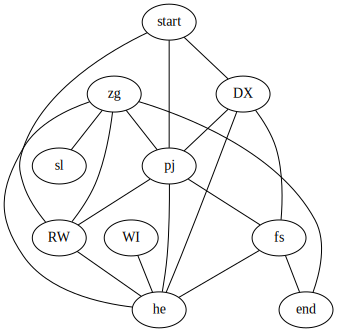

In [22]:
G = make_graph(test_text3)
print(len(find_paths(G, ("start",), "end")))
graphviz.Source(nx.nx_pydot.to_pydot(G).to_string())

3563


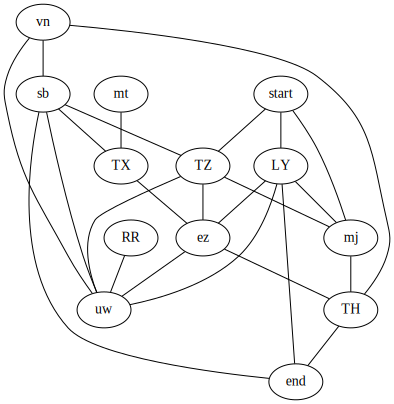

In [23]:
G = make_graph(input_text)
print(len(find_paths(G, ("start",), "end")))
graphviz.Source(nx.nx_pydot.to_pydot(G).to_string())

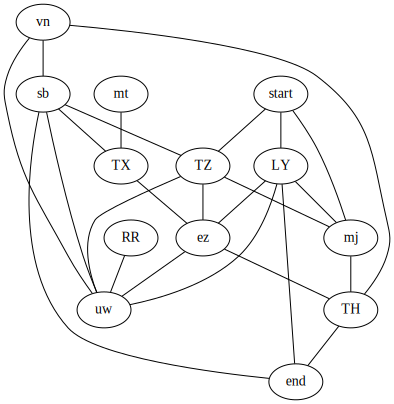

In [18]:
graphviz.Source(nx.nx_pydot.to_pydot(G).to_string())

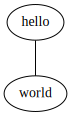

In [15]:
dot = graphviz.Graph()
dot.edge("hello", "world")
dot

In [31]:
nx.nx_pydot.to_pydot(G).to_string()

'strict graph  {\nTH;\nsb;\nLY;\nvn;\nRR;\nmt;\nend;\nTZ;\nez;\nTX;\nuw;\nstart;\nmj;\nTH -- vn;\nTH -- end;\nTH -- mj;\nTH -- ez;\nsb -- uw;\nsb -- TX;\nsb -- TZ;\nsb -- end;\nsb -- vn;\nLY -- start;\nLY -- uw;\nLY -- mj;\nLY -- end;\nLY -- ez;\nvn -- uw;\nRR -- uw;\nmt -- TX;\nTZ -- mj;\nTZ -- ez;\nTZ -- start;\nTZ -- uw;\nez -- TX;\nez -- uw;\nstart -- mj;\n}\n'

# Part 2

In [10]:
@cache
def test_valid_path(path):
    node_count = collections.Counter(path)
    small_count = 0

    for node, count in node_count.items():

        if count > 1:

            if node.islower():

                if node in ("start", "end"):
                    return False
                elif (count == 2) and (small_count == 0):
                    small_count = 1
                else:
                    return False

        if count > 10:
            return False

    return True

In [11]:
len(find_paths(make_graph(test_text), ("start",), "end"))

36

In [12]:
len(find_paths(make_graph(test_text2), ("start",), "end"))

103

In [13]:
len(find_paths(make_graph(test_text3), ("start",), "end"))

3509

In [14]:
len(find_paths(make_graph(input_text), ("start",), "end"))

105453